In [4]:
import nltk
import nltk.sentiment
import numpy as np
import json
import pickle
import timeit
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re

In [5]:
f = open("../stopwords_list.dat")
stopwords = set([word.strip().lower() for word in f.readlines()])
f.close()

In [6]:
devfile = "../../A1_Data/dev.json"
trainfile = "../../A1_Data/train.json"

### Train Model

In [7]:
feature_vector = pickle.load(open("neg_tfidf_train_vector.pickle","rb"))

In [21]:
train_labels = []
f = open(trainfile,"r")
while(True):
    s = f.readline()
    if (s==""):
        break
    json_dump = json.loads(s)    
    train_labels.append(json_dump["ratings"])
f.close()

In [39]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(penalty="l2", multi_class='ovr', solver="saga", max_iter=2000, n_jobs=2)

In [40]:
start = timeit.default_timer()
print(model_log.fit(feature_vector, train_labels))
print(timeit.default_timer()-start)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)
160.22699302599995


In [41]:
pickle.dump(model_log,open("neg_logist_model.pickle", "wb"))

In [ ]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(penalty="l2", loss="squared_hinge", dual=True, tol=0.0001, C=1.0, multi_class="ovr",
                 fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None,
                  max_iter=1000)

In [ ]:
start = timeit.default_timer()
print(model_svc.fit(feature_vector, train_labels))
print("Train time:",timeit.default_timer()-start)

In [ ]:
pickle.dump(m2,open("neg_svc_model.pickle", "wb"))

### Validation phase

In [42]:
dev_feature_vector = pickle.load(open("neg_tfidf_dev_vector.pickle","rb"))

In [43]:
dev_labels = []
dev_data = []
f = open(devfile,"r")
while(True):
    s = f.readline()
    if (s==""):
        break
    json_dump = json.loads(s)    
    dev_labels.append(json_dump["ratings"])
    dev_data.append(json_dump["review"])
f.close()

In [44]:
y_pred = (model_log.predict(dev_feature_vector) + model_svc.predict(dev_feature_vector))/2
diff = y_pred - np.array(dev_labels)
cost = np.sum(diff*diff)
print("Cost: \t\t",cost)

array([[25537,  5864,  1912,   568,   649],
       [ 1934,  4364,  1942,   317,    75],
       [  758,  3460,  7993,  2516,   406],
       [  495,  1453,  7550, 20901,  8557],
       [ 1065,   998,  2719, 19704, 78263]])

In [45]:
print("Cost: \t\t",score)

Accuracy: 	 0.68529
Cost: 		 128435


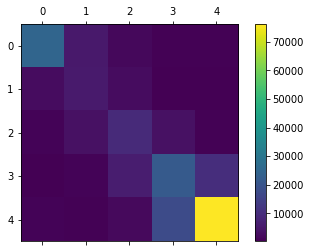

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
fig.colorbar(cax)

In [37]:
sigmoid_m1(1.0)

ZeroDivisionError: float division by zero